[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dolba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                          University  Country     City  \
0  Université des Sciences et de la Technologie H...  Algeria  Algiers   
1           Université Benyoucef Benkhedda d’Alger 1  Algeria  Algiers   
2          École Nationale Supérieure d’Informatique  Algeria  Algiers   
3                      École Nationale Polytechnique  Algeria  Algiers   
4       Université Abou el Kacem Saâdallah d’Alger 2  Algeria  Algiers   

   Global Rank  
0     0.288903  
1     0.386514  
2     0.494813  
3     0.503772  
4     0.504558  
       principal_component_1
count           1.281400e+04
mean           -2.661624e-17
std             2.884628e-01
min            -5.011127e-01
25%            -2.496784e-01
50%             5.769806e-04
75%             2.495749e-01
max             4.988873e-01


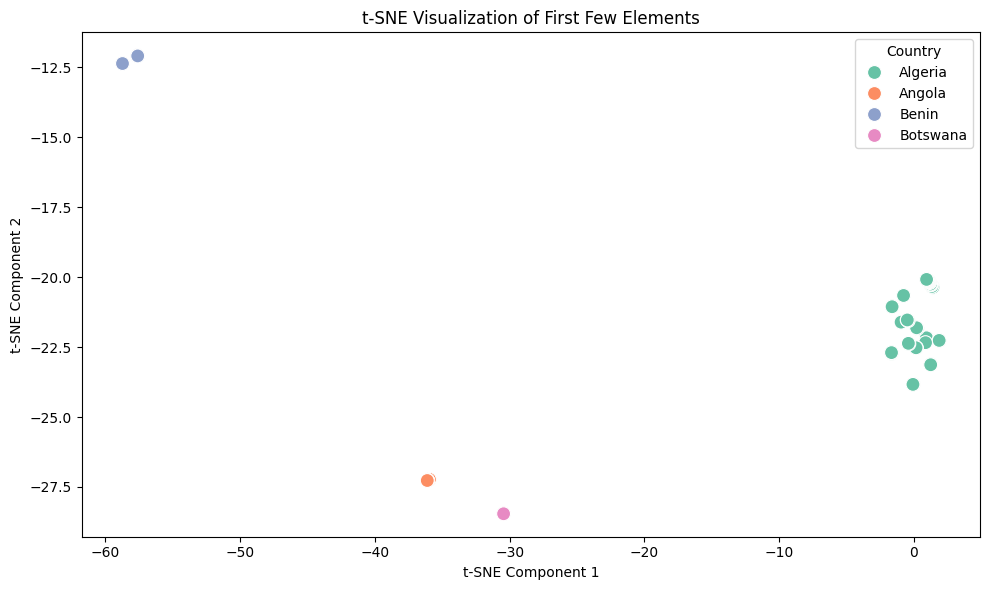

           tsne_1      tsne_2
count  500.000000  500.000000
mean     0.241760   -0.030347
std     20.181818   11.143599
min    -36.709225  -19.715393
25%    -15.282942   -9.886842
50%      1.167617   -0.273629
75%     16.828739    8.409491
max     34.399586   22.638336


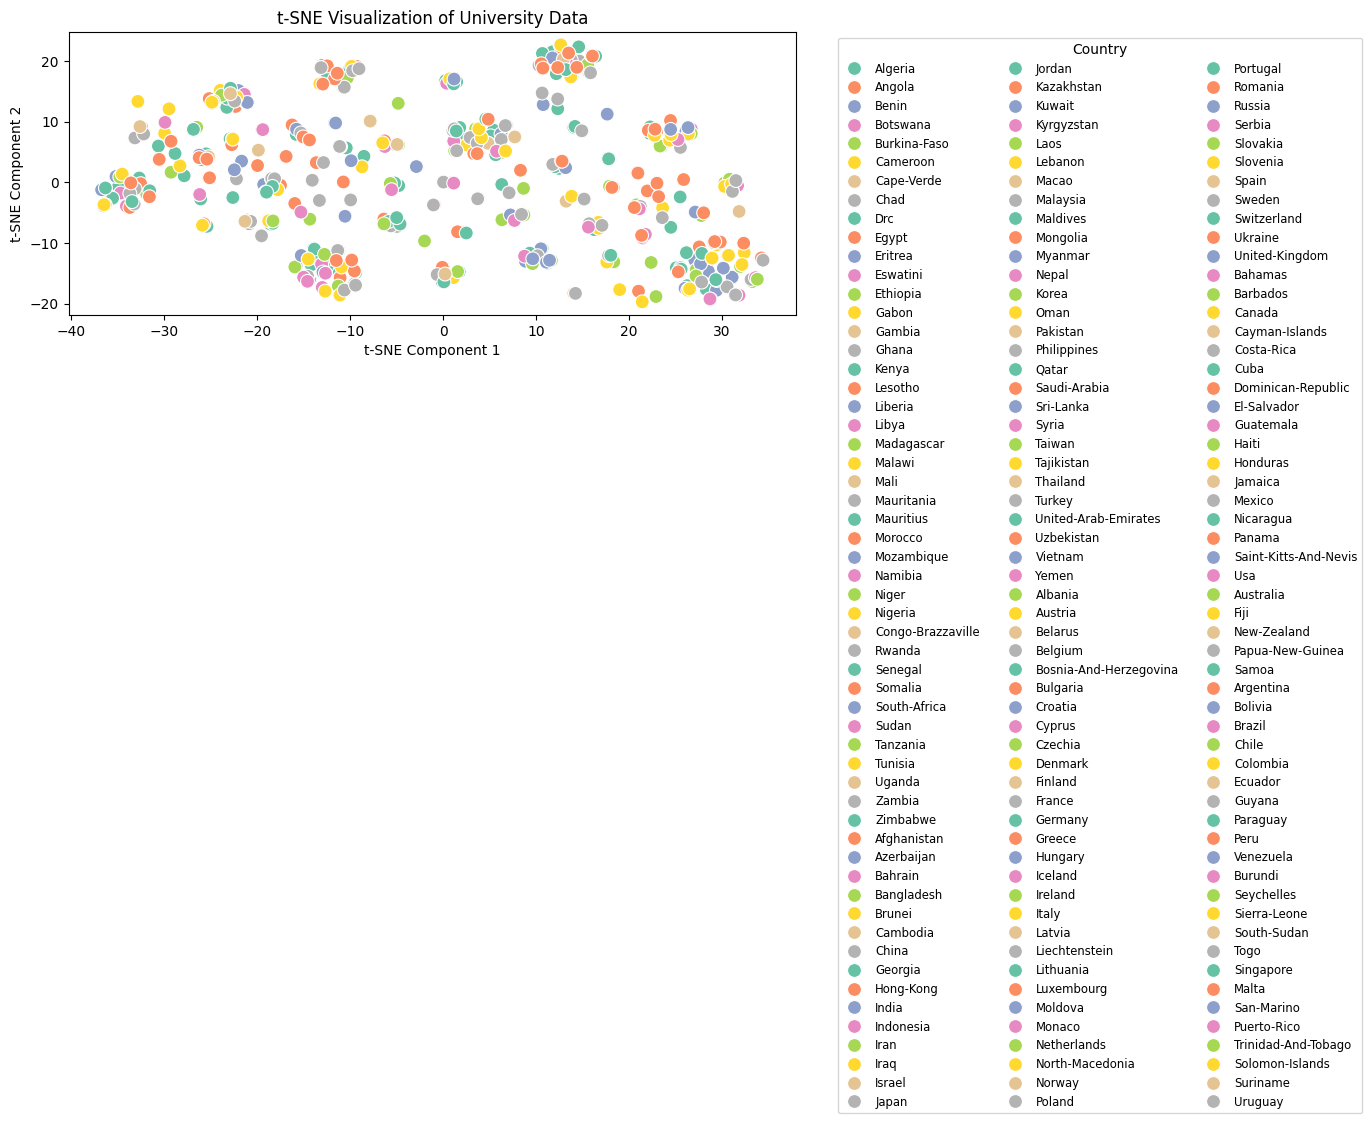

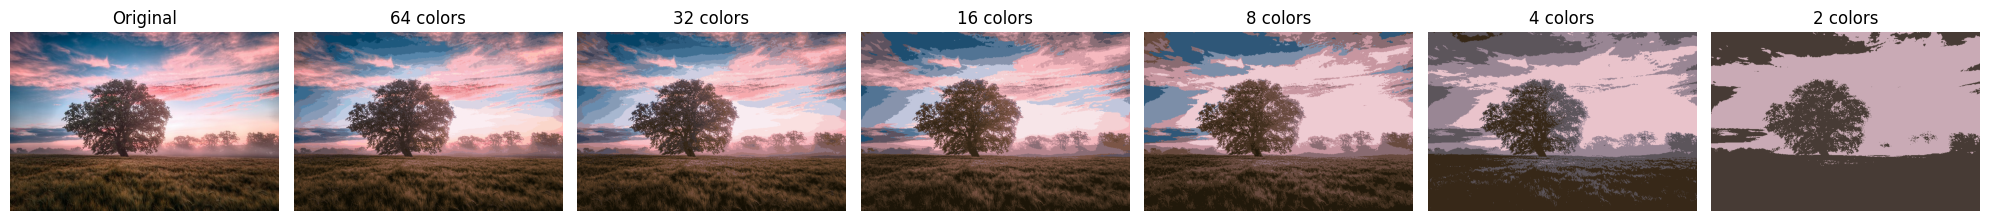

WordCloud for Ham Messages:


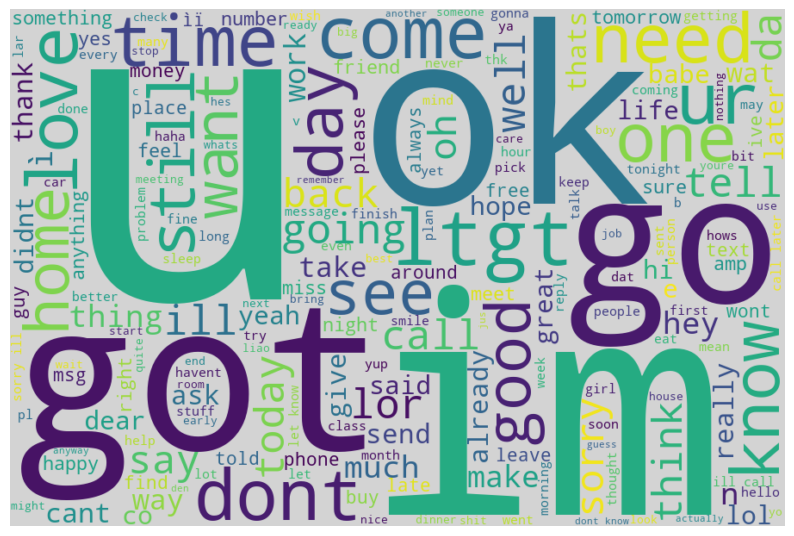

WordCloud for Spam Messages:


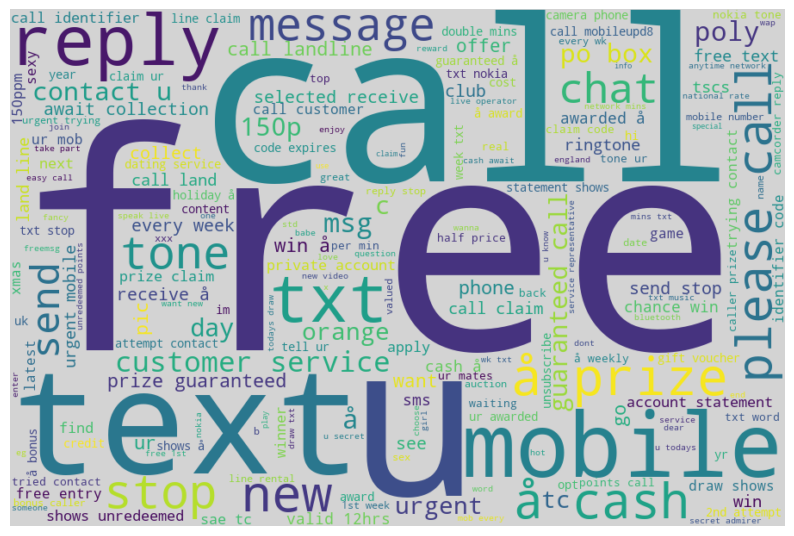

Best accuracy: 0.9623318385650225 when K = 1

Classification Report:

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       982
        spam       1.00      0.68      0.81       133

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.90      1115
weighted avg       0.96      0.96      0.96      1115


Confusion Matrix:

[[982   0]
 [ 42  91]]


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from PIL import Image
import string
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
from sklearn import preprocessing, utils, tree, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn. metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import wordcloud
from wordcloud import WordCloud, STOPWORDS

nltk.download('stopwords')
file = "top universities.csv"

df = pd.read_csv(file)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])
df[numeric_columns] = scaled_data
print(df.head())

X = df[numeric_columns]
y = df['Country']
principal_components = PCA(n_components=1)
X_pca = principal_components.fit_transform(X)
X_pca = pd.DataFrame({'principal_component_1': X_pca[:, 0]})
pca_df = pd.concat([X_pca, y.reset_index(drop=True)], axis=1)
print(pca_df.describe())

categorical_columns = ['Country', 'City']
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[categorical_columns]).toarray()
X_combined = np.hstack((df[numeric_columns], encoded_data))
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_combined)
X_tsne = pd.DataFrame({'tsne_component_1': X_tsne[:, 0], 'tsne_component_2': X_tsne[:, 1]})
tsne_df = pd.concat([X_tsne, df['Country'].reset_index(drop=True)], axis=1)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df.head(100), x='tsne_component_1', y='tsne_component_2', hue='Country', palette='Set2', s=100)
plt.title('t-SNE Visualization of First Few Elements')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.tight_layout()
plt.show()

categorical_columns = ['Country', 'City']
encoder = OneHotEncoder()
df_sampled = df.sample(n=500, random_state=42)
encoded_data = encoder.fit_transform(df_sampled[categorical_columns]).toarray()
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
X_combined = np.hstack((df_sampled[numeric_columns], encoded_data))
y = df['Country']
tsne = TSNE(n_components=2, learning_rate='auto', init='pca', random_state=42)
X_tsne = tsne.fit_transform(X_combined)
X_tsne = pd.DataFrame({'tsne_1': X_tsne[:, 0], 'tsne_2': X_tsne[:, 1]})
tsne_df = pd.concat([X_tsne, y.reset_index(drop=True)], axis=1)
print(tsne_df.describe())
plt.figure(figsize=(14, 8))
sns.scatterplot(data=tsne_df, x='tsne_1', y='tsne_2', hue='Country', palette='Set2', s=100)
plt.title('t-SNE Visualization of University Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=3)
plt.tight_layout()
plt.show()

n_colors = [64, 32, 16, 8, 4, 2]
img = Image.open('photo.jpg')
img = np.array(img, dtype=np.float64) / 255
w, h, d = original_shape = tuple(img.shape)
assert d == 3
img_array = np.reshape(img, (w * h, d))
img_array_sample = shuffle(img_array, random_state=0, n_samples=1_000)
kmeans_arr = []
labels_arr = []
for i in range(len(n_colors)):
    kmeans_arr.append(KMeans(n_clusters=n_colors[i], random_state=0).fit(img_array_sample))
    labels_arr.append(kmeans_arr[i].predict(img_array))
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)
plt.figure(figsize=(20, 10))
plt.subplot(1, len(n_colors) + 1, 1)
plt.axis("off")
plt.title("Original")
plt.imshow(img)
for i, n_color in enumerate(n_colors):
    plt.subplot(1, len(n_colors) + 1, i + 2)
    plt.axis("off")
    plt.title(f"{n_color} colors")
    recreated_img = recreate_image(kmeans_arr[i].cluster_centers_, labels_arr[i], w, h)
    plt.imshow(recreated_img)
plt.tight_layout()
plt.show()

file_path = 'spam.csv'
df = pd.read_csv(file_path, encoding='latin-1')
df.rename(columns={'v1': 'Category', 'v2': 'Message'}, inplace=True)
df = df[['Category', 'Message']]
def cleaning(value):
    punctuation_cleaning = []
    stopwords_cleaning_string = ''
    for i in value:
        if i not in string.punctuation:
            punctuation_cleaning.append(i)
    punctuation_cleaning = "".join(punctuation_cleaning).split()
    for j in punctuation_cleaning:
        if j.lower() not in stopwords.words("english"):
            stopwords_cleaning_string += j.lower() + ' '
    return stopwords_cleaning_string
df['Message'] = df['Message'].apply(cleaning)
def visualisation(Category):
    text = ' '.join(df[df['Category'] == Category]['Message'])
    stopwords_set = set(STOPWORDS)
    wc_figure = WordCloud(stopwords=stopwords_set, background_color='lightgrey', width=900, height=600).generate(text)
    plt.figure(figsize=(10, 7), frameon=True)
    plt.imshow(wc_figure, interpolation='bilinear')
    plt.axis('off')
    plt.show()
print("WordCloud for Ham Messages:")
visualisation("ham")
print("WordCloud for Spam Messages:")
visualisation("spam")

X = df['Message']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
tfidfv = TfidfVectorizer()
X_train_vectorised = tfidfv.fit_transform(X_train)
X_test_vectorised = tfidfv.transform(X_test)
accuracy = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_vectorised, y_train)
    y_pred = knn.predict(X_test_vectorised)
    accuracy.append(accuracy_score(y_test, y_pred))
best_k = accuracy.index(max(accuracy)) + 1
print(f"Best accuracy: {max(accuracy)} when K = {best_k}")
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_vectorised, y_train)
y_pred = knn.predict(X_test_vectorised)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))